In [515]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [516]:
#train_data_pri = pd.read_csv('./data/private_train.csv')
train_data_pri = pd.read_csv('./data/private_train_2.csv')
test_data_pri = pd.read_csv('./data/private_test.csv')
#train_data_pri_p = pd.read_csv('private_train_2.csv')

In [517]:
train_data_2017 = train_data_pri[train_data_pri.month.str.contains('2017')]
train_data_2015 = train_data_pri[train_data_pri.month.str.contains('2015')]
train_data_2016 = train_data_pri[train_data_pri.month.str.contains('2016')]
train_data_2014 = train_data_pri[train_data_pri.month.str.contains('2014')]

train_data_pri = pd.concat([train_data_2014,train_data_2015,train_data_2016,train_data_2017])
train_data_pri.shape

(70022, 21)

In [518]:
train_data_pri = train_data_pri.drop(['index'],axis=1)
test_data_pri = test_data_pri.drop(['index'],axis=1)
print train_data_pri.shape
#print train_data_pri_p.shape
print test_data_pri.shape
print "List of Columns:\n", ", ".join(train_data_pri.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_pri.columns), "\n\n"

(70022, 20)
(4033, 19)
List of Columns:
project_name, address, floor_area_sqm, type_of_land, price, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 


List of Columns:
project_name, address, floor_area_sqm, type_of_land, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 




In [519]:
train_data_pri.type_of_sale.unique()

array(['New Sale', 'Resale', 'Sub Sale'], dtype=object)

In [520]:
test_data_pri.type_of_sale.unique()

array(['Resale'], dtype=object)

In [521]:
train_data_pri.groupby(['type_of_sale'])['price'].count()

type_of_sale
New Sale    40062
Resale      28255
Sub Sale     1705
Name: price, dtype: int64

In [522]:
#train_data_pri = train_data_pri[train_data_pri.type_of_sale == 'Resale'] #not helping

In [523]:
train_data_pri.shape

(70022, 20)

In [524]:
#train_data_pri = train_data_pri.drop(train_data_pri[train_data_pri.price > 20000000].index)

In [525]:
train_data_pri.shape

(70022, 20)

In [526]:
test_data_pri[test_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Series([], Name: completion_date, dtype: int64)

In [527]:
train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Uncompleted    38056
Name: completion_date, dtype: int64

In [528]:
#train_data_pri = train_data_pri.drop(train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].index) 

In [529]:
train_data_pri.shape

(70022, 20)

In [530]:
test_data_pri.completion_date.unique()

array(['2014', '1995', '1979', '2015', '2016', '1992', '1998', '1986',
       '2011', '2010', '2000', '2012', '2001', '1999', '1968', '2004',
       '2006', 'Unknown', '2005', '2009', '1975', '2013', '1996', '1997',
       '1991', '1994', '2002', '1982', '2008', '2007', '1987', '1978',
       '1983', '1984', '1972', '1990', '1993', '1971', '2003', '1969',
       '1985', '1989', '2017', '1980', '1976', '1956', '1988', '1967',
       '1958', '1957', '1955', '1977', '1960', '1966', '1965', '1961',
       '1974', '1953', '1941', '1970', '1981', '1950', '1963', '1962'], dtype=object)

In [531]:
train_data_pri.completion_date.unique()

array(['Uncompleted', '1998', '1997', '2009', '2014', '2005', '2006',
       '2008', '2001', '1987', '1980', '2003', '2002', 'Unknown', '2007',
       '2013', '2012', '2000', '1995', '1989', '1978', '2004', '1981',
       '1999', '1986', '2010', '2011', '1982', '1985', '1992', '1958',
       '1996', '1994', '1979', '1953', '1993', '1983', '1974', '1975',
       '1991', '1976', '1984', '1962', '1990', '1988', '1977', '1972',
       '3/9/2009', '3/25/2014', '4/28/2005', '9/30/2009', '6/19/2013',
       '9/1/2003', '3/1/1986', '1963', '4/1/2002', '9/1/1980', '8/15/2012',
       '2/2/2006', '1973', '6/28/2013', '1957', '1949', '1956', '4/1/2004',
       '4/1/1996', '8/31/2009', '12/1/1972', '6/26/2008', '12/5/2011',
       '7/1/1991', '7/2/2010', '4/1/2011', '10/23/2006', '10/25/2005',
       '4/1/1997', '7/1/1976', '6/1/1987', '7/9/2009', '6/28/2000',
       '9/30/2004', '5/26/2005', '7/19/2006', '2/20/2008', '11/1/2000',
       '1965', '7/1/1994', '4/28/1999', '5/30/2000', '1961', '1970'

In [532]:
test_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [533]:
train_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [534]:
test_data_pri[test_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [535]:
train_data_pri[train_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [536]:
train_data_pri = train_data_pri.drop(train_data_pri[train_data_pri['type_of_land'] == 'Unknown'].index) 

In [537]:
train_data_pri.shape

(70022, 20)

In [538]:
train_data_pri['contract_date'] = pd.to_datetime(train_data_pri['contract_date'])
train_data_pri['contract_date'] = train_data_pri['contract_date'].dt.strftime('%d/%m/%Y')
train_data_pri.contract_date.unique()

array([u'30/01/2014', u'29/01/2014', u'28/01/2014', ..., u'03/08/2017',
       u'02/08/2017', u'01/08/2017'], dtype=object)

In [539]:
test_data_pri['contract_date'] = pd.to_datetime(test_data_pri['contract_date'])
test_data_pri['contract_date'] = test_data_pri['contract_date'].dt.strftime('%d/%m/%Y')
test_data_pri.contract_date.unique()

array([u'29/09/2017', u'28/09/2017', u'27/09/2017', u'26/09/2017',
       u'25/09/2017', u'22/09/2017', u'21/09/2017', u'20/09/2017',
       u'19/09/2017', u'18/09/2017', u'15/09/2017', u'14/09/2017',
       u'13/09/2017', u'12/09/2017', u'11/09/2017', u'08/09/2017',
       u'07/09/2017', u'06/09/2017', u'05/09/2017', u'04/09/2017',
       u'09/09/2017', u'05/10/2017', u'04/10/2017', u'03/10/2017',
       u'02/10/2017', u'23/09/2017', u'19/10/2017', u'18/10/2017',
       u'17/10/2017', u'16/10/2017', u'13/10/2017', u'12/10/2017',
       u'11/10/2017', u'10/10/2017', u'09/10/2017', u'06/10/2017',
       u'01/11/2017', u'31/10/2017', u'30/10/2017', u'29/10/2017',
       u'28/10/2017', u'27/10/2017', u'26/10/2017', u'25/10/2017',
       u'24/10/2017', u'23/10/2017', u'22/10/2017', u'21/10/2017',
       u'20/10/2017', u'11/11/2017', u'10/11/2017', u'09/11/2017',
       u'08/11/2017', u'07/11/2017', u'06/11/2017', u'03/11/2017',
       u'02/11/2017', u'27/11/2017', u'26/11/2017', u'24/11/20

In [540]:
train_data_pri.month.unique()

array(['2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6',
       '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12',
       '2015-1', '2015-2', '2015-3', '2015-4', '2015-5', '2015-6',
       '2015-7', '2015-8', '2015-9', '2015-10', '2015-11', '2015-12',
       '2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6',
       '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12',
       '2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6',
       '2017-7', '2017-8'], dtype=object)

In [541]:
test_data_pri.month.unique()

array(['2017-9', '2017-10', '2017-11'], dtype=object)

In [542]:
train_data_pri.property_type.unique()

array(['Executive Condominium', 'Apartment', 'Condominium',
       'Detached House', 'Terrace House', 'Semi-Detached House'], dtype=object)

In [543]:
test_data_pri.property_type.unique()

array(['Condominium', 'Apartment', 'Terrace House', 'Semi-Detached House',
       'Detached House', 'Executive Condominium'], dtype=object)

In [544]:
train_data_pri.tenure.unique()

array(['99 Yrs From 04/12/2012', '99 Yrs From 01/07/2011',
       '99 Yrs From 18/03/2013', '999 Yrs From 21/06/1877',
       '99 Yrs From 11/03/2013', 'Freehold', '99 Yrs From 01/12/1993',
       '99 Yrs From 06/08/2012', '99 Yrs From 21/08/2012',
       '99 Yrs From 01/10/2012', '60 Yrs From 19/02/2013',
       '99 Yrs From 20/06/2000', '99 Yrs From 22/01/2003',
       '99 Yrs From 08/04/2013', '99 Yrs From 05/11/2012',
       '99 Yrs From 10/09/2012', '99 Yrs From 16/02/1998',
       '99 Yrs From 01/12/1975', '99 Yrs From 13/02/2013',
       '99 Yrs From 02/07/2012', '99 Yrs From 01/08/1994',
       '99 Yrs From 30/04/2000', '99 Yrs From 01/11/1984',
       '99 Yrs From 30/05/2011', '99 Yrs From 30/01/2012',
       '99 Yrs From 25/02/2013', '99 Yrs From 03/09/2012',
       '99 Yrs From 11/02/2009', '99 Yrs From 26/02/2004',
       '99 Yrs From 16/12/1997', '99 Yrs From 21/01/2013',
       '99 Yrs From 02/06/2010', '99 Yrs From 07/11/2012',
       '103 Yrs From 12/08/2013', '99 Yrs F

In [545]:
test_data_pri.tenure.unique()

array(['99 Yrs From 08/04/2010', 'Freehold', '99 Yrs From 20/10/2010',
       '999 Yrs From 21/06/1877', '99 Yrs From 01/03/1991',
       '999 Yrs From 01/01/1954', '99 Yrs From 07/12/2011',
       '99 Yrs From 26/06/1996', '99 Yrs From 17/03/1982',
       '99 Yrs From 10/09/2007', '99 Yrs From 12/08/1996',
       '99 Yrs From 24/06/1995', '99 Yrs From 24/04/1996',
       '99 Yrs From 26/02/2007', '99 Yrs From 31/12/2007',
       '99 Yrs From 16/08/1999', '99 Yrs From 15/03/2006',
       '99 Yrs From 20/01/2004', '99 Yrs From 07/01/2008',
       '99 Yrs From 10/08/2011', '999 Yrs From 01/05/1874',
       '99 Yrs From 07/06/2011', '99 Yrs From 06/01/2010',
       '99 Yrs From 08/03/1982', '99 Yrs From 16/06/2010',
       '99 Yrs From 20/10/1993', '99 Yrs From 17/03/1997',
       '99 Yrs From 11/07/2011', '103 Yrs From 18/08/2009',
       '99 Yrs From 11/12/2007', '99 Yrs From 30/05/2011',
       '999 Yrs From 01/01/1955', '99 Yrs From 16/02/1998',
       '99 Yrs From 21/06/2001', '99 Yr

In [546]:
train_data_pri.postal_district.unique()

array([19,  7, 27, 21, 15, 26, 14, 25, 18, 13, 23, 20, 16,  9, 10, 11, 28,
        4,  3,  5, 17, 12,  8,  2, 22,  1,  6])

In [547]:
train_data_pri.postal_sector.unique()

array([82, 18, 75, 58, 43, 78, 42, 41, 73, 52, 34, 59, 65, 68, 56, 46, 51,
       23, 76, 25, 28, 79, 39, 40, 54, 57, 10, 15, 27, 53, 38, 80, 26, 12,
       11, 67, 50, 33, 20, 21, 24, 32,  7, 64,  9, 30, 66, 55, 48, 29, 77,
        6, 45,  1, 22, 47, 44, 36, 16, 35,  8, 31, 60, 63, 13,  5, 19, 14,
       17, 61, 49])

In [548]:
train_data_pri.postal_code.unique()

array([828774, 189350, 757052, ..., 558287, 266178, 266180])

In [549]:
train_data_pri.region.unique()

array(['North East Region', 'Central Region', 'North Region',
       'West Region', 'East Region'], dtype=object)

In [550]:
train_data_pri.area.unique()

array(['Punggol', 'Downtown Core', 'Sembawang', 'Bukit Panjang', 'Geylang',
       'Ang Mo Kio', 'Bedok', 'Woodlands', 'Tampines', 'Toa Payoh',
       'Bukit Timah', 'Bukit Batok', 'Choa Chu Kang', 'Pasir Ris',
       'River Valley', 'Yishun', 'Tanglin', 'Sengkang', 'Newton', 'Bishan',
       'Bukit Merah', 'Queenstown', 'Kallang', 'Hougang',
       'Singapore River', 'Clementi', 'Jurong West', 'Novena', 'Serangoon',
       'Marine Parade', 'Mandai', 'Museum', 'Outram', 'Southern Islands',
       'Rochor', 'Jurong East', 'Orchard', 'Sungei Kadut', 'Paya Lebar',
       'Changi  '], dtype=object)

In [551]:
test_data_pri.area.unique()

array(['Bukit Timah', 'Kallang', 'Serangoon', 'Pasir Ris', 'Tanglin',
       'Yishun', 'Hougang', 'Woodlands', 'Bedok', 'Bishan', 'Queenstown',
       'Geylang', 'Bukit Merah', 'River Valley', 'Novena', 'Newton',
       'Punggol', 'Singapore River', 'Tampines', 'Marine Parade',
       'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Batok', 'Museum', 'Sembawang',
       'Downtown Core', 'Jurong East', 'Toa Payoh', 'Rochor',
       'Southern Islands', 'Bukit Panjang', 'Sengkang', 'Clementi',
       'Jurong West', 'Outram', 'Orchard', 'Mandai', 'Changi  '], dtype=object)

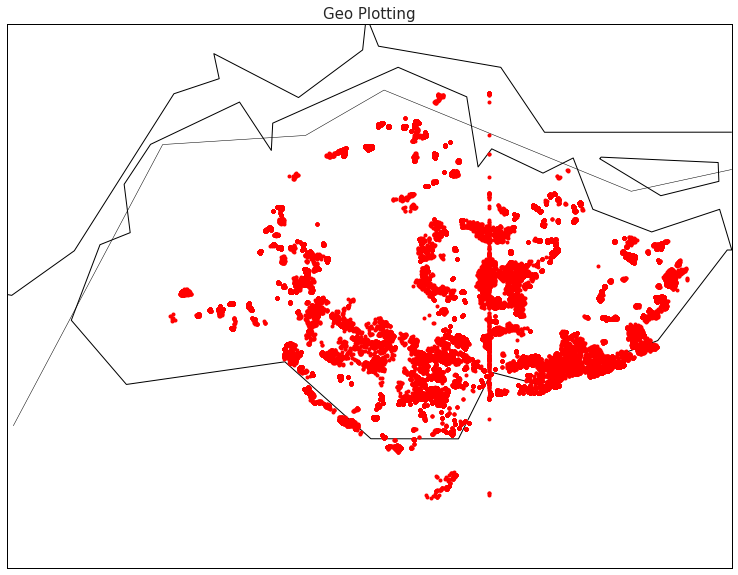

In [552]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_pri[cols]

#latlong = latlong.drop(latlong[(latlong.latitude>1.4) & (latlong.latitude<1.6) & (latlong.longitude>103.6) & (latlong.longitude<103.72)].index)
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
#m = Basemap(projection='merc',llcrnrlat=1.4,urcrnrlat=1.6,
 #           llcrnrlon=103.6, urcrnrlon=103.72, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,\
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
 
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
#x,y=m([103.714098,103.714216],[1.348241,1.347004])

 

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()

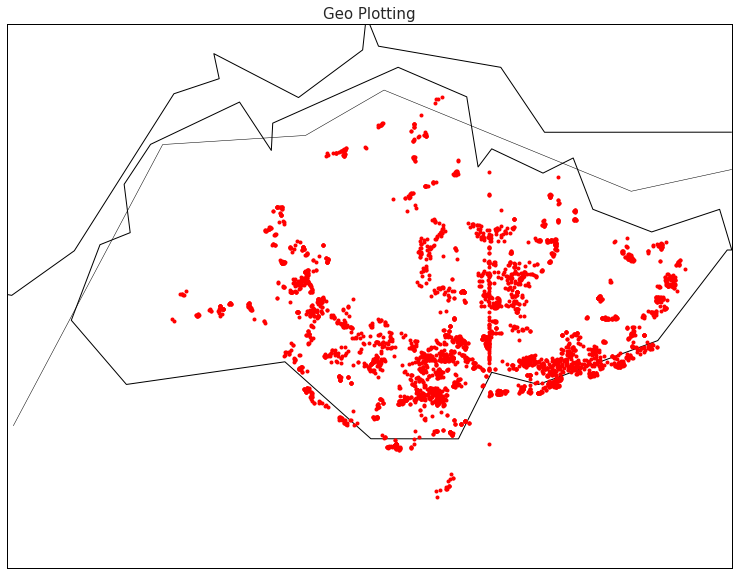

In [553]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
#latlong = train_data_hdb[cols]
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_pri['longitude'].values
lats = test_data_pri['latitude'].values
x,y = m(lons, lats)

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()


 mu = 1499289.08 and sigma = 1553028.12



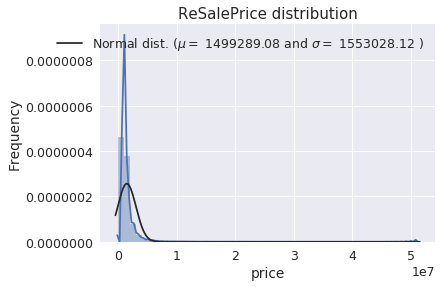

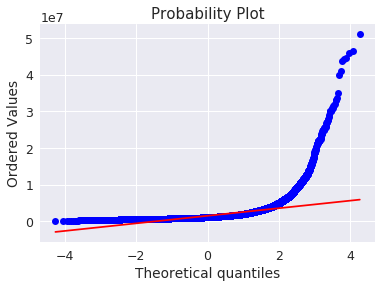

Skewness: 9.169009
Kurtosis: 151.569022


In [554]:
sns.distplot(train_data_pri['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [555]:
train_data_pri['price'].describe()

count    7.002200e+04
mean     1.499289e+06
std      1.553039e+06
min      5.000000e+04
25%      8.500000e+05
50%      1.107000e+06
75%      1.580000e+06
max      5.100000e+07
Name: price, dtype: float64

In [556]:
ntrain = train_data_pri.shape[0]
ntest = test_data_pri.shape[0]
y_train = train_data_pri.price.values
all_data = pd.concat((train_data_pri, test_data_pri)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (74055, 19)


In [557]:
all_data.head()

,address,area,completion_date,contract_date,floor_area_sqm,floor_num,latitude,longitude,month,postal_code,postal_district,postal_sector,project_name,property_type,region,tenure,type_of_land,type_of_sale,unit_num
0,126 Punggol Walk #07-05,Punggol,Uncompleted,30/01/2014,106,7.0,1.400918,103.897199,2014-1,828774,19,82,ECOPOLITAN,Executive Condominium,North East Region,99 Yrs From 04/12/2012,Strata,New Sale,5.0
1,1 Fraser Street #14-08,Downtown Core,Uncompleted,30/01/2014,39,14.0,1.300130,103.857268,2014-1,189350,7,18,DUO RESIDENCES,Apartment,Central Region,99 Yrs From 01/07/2011,Strata,New Sale,8.0
2,19 Sembawang Crescent #01-33,Sembawang,Uncompleted,30/01/2014,115,1.0,1.443653,103.819952,2014-1,757052,27,75,SKYPARK RESIDENCES,Executive Condominium,North Region,99 Yrs From 18/03/2013,Strata,New Sale,33.0
3,47 Hindhede Walk #06-03,Bukit Panjang,1998,30/01/2014,105,6.0,1.347668,103.771801,2014-1,587977,21,58,SPRINGDALE CONDOMINIUM,Condominium,West Region,999 Yrs From 21/06/1877,Strata,Resale,3.0
4,19 Punggol Field Walk #14-09,Punggol,Uncompleted,30/01/2014,158,14.0,1.390655,103.912753,2014-1,828748,19,82,WATERWOODS,Executive Condominium,North East Region,99 Yrs From 11/03/2013,Strata,New Sale,9.0


In [558]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
unit_num,7.859024
floor_num,7.859024


In [559]:
train_missing = (train_data_pri.isnull().sum() / len(train_data_pri)) * 100
train_missing = train_missing.drop(train_missing[train_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_missing})
missing_data

,Missing Ratio
unit_num,7.4091
floor_num,7.4091


In [560]:
test_missing = (test_data_pri.isnull().sum() / len(test_data_pri)) * 100
test_missing = test_missing.drop(test_missing[test_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_missing})
missing_data

,Missing Ratio
unit_num,15.670717
floor_num,15.670717


In [561]:
train_data_pri[train_data_pri['unit_num'].isnull()]

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
115546,N.A.,29 Margoliouth Road,1687,Land,30800000,29/01/2014,Detached House,Freehold,1987,Resale,10,25,258555,Central Region,Tanglin,2014-1,1.317889,103.823118,NaN,NaN
115599,ALANA,156 Sunrise Terrace,284,Strata,2472900,28/01/2014,Terrace House,103 Yrs From 12/08/2013,Uncompleted,New Sale,28,80,804555,North East Region,Ang Mo Kio,2014-1,1.388806,103.855308,NaN,NaN
115609,GREENRIDGE,52 Greenridge Crescent,170,Land,2450000,28/01/2014,Terrace House,Freehold,1987,Resale,21,59,598940,Central Region,Bukit Timah,2014-1,1.335291,103.765746,NaN,NaN
115612,JC VILLE,201 Joo Chiat Place,207,Strata,2280000,28/01/2014,Terrace House,Freehold,1989,Resale,15,42,427915,Central Region,Geylang,2014-1,1.314389,103.905170,NaN,NaN
115622,HENRY PARK,6 Grove Avenue,185,Land,4080000,28/01/2014,Terrace House,Freehold,1978,Resale,10,27,279182,Central Region,Bukit Timah,2014-1,1.312532,103.784182,NaN,NaN
115641,N.A.,7 Faber Avenue,423,Land,5880000,28/01/2014,Semi-Detached House,Freehold,Unknown,Resale,5,12,129521,West Region,Clementi,2014-1,1.317953,103.758595,NaN,NaN
115652,MOUNT ECHO PARK,44 Mount Echo Park,1554,Land,25000000,27/01/2014,Detached House,Freehold,1987,Resale,10,24,248795,Central Region,Tanglin,2014-1,1.295714,103.819955,NaN,NaN
115672,GENTLE VILLAS,28 Gentle Drive,210,Land,3200000,27/01/2014,Semi-Detached House,99 Yrs From 27/01/1993,1995,Resale,11,30,309231,Central Region,Novena,2014-1,1.320400,103.841670,NaN,NaN
115691,SERANGOON GARDEN ESTATE,12 Ripley Crescent,445,Land,4550000,25/01/2014,Semi-Detached House,999 Yrs From 01/01/1953,Unknown,Resale,19,55,556190,North East Region,Serangoon,2014-1,1.363874,103.871803,NaN,NaN
115705,N.A.,18B Flanders Square,95,Strata,820000,24/01/2014,Apartment,Freehold,Unknown,Resale,8,20,209304,Central Region,Kallang,2014-1,1.312024,103.857320,NaN,NaN


In [562]:
train_data_pri.floor_num.describe()

count    64834.000000
mean         9.957707
std          7.708764
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max         74.000000
Name: floor_num, dtype: float64

In [563]:
test_data_pri.floor_num.describe()

count    3401.000000
mean        9.045575
std         8.008414
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        68.000000
Name: floor_num, dtype: float64

In [564]:
train_data_pri.price.describe()

count    7.002200e+04
mean     1.499289e+06
std      1.553039e+06
min      5.000000e+04
25%      8.500000e+05
50%      1.107000e+06
75%      1.580000e+06
max      5.100000e+07
Name: price, dtype: float64

In [565]:
train_data_pri[train_data_pri['floor_num'].isnull()].price.describe()

count    5.188000e+03
mean     3.809449e+06
std      3.789293e+06
min      5.000000e+04
25%      2.120000e+06
50%      2.821150e+06
75%      3.989166e+06
max      4.638000e+07
Name: price, dtype: float64

In [566]:
train_data_pri[(train_data_pri['price'] > 3400000) & (train_data_pri['price'] < 3700000)].floor_num.describe()

count    292.000000
mean      12.797945
std       10.374612
min        1.000000
25%        5.000000
50%       10.000000
75%       19.000000
max       67.000000
Name: floor_num, dtype: float64

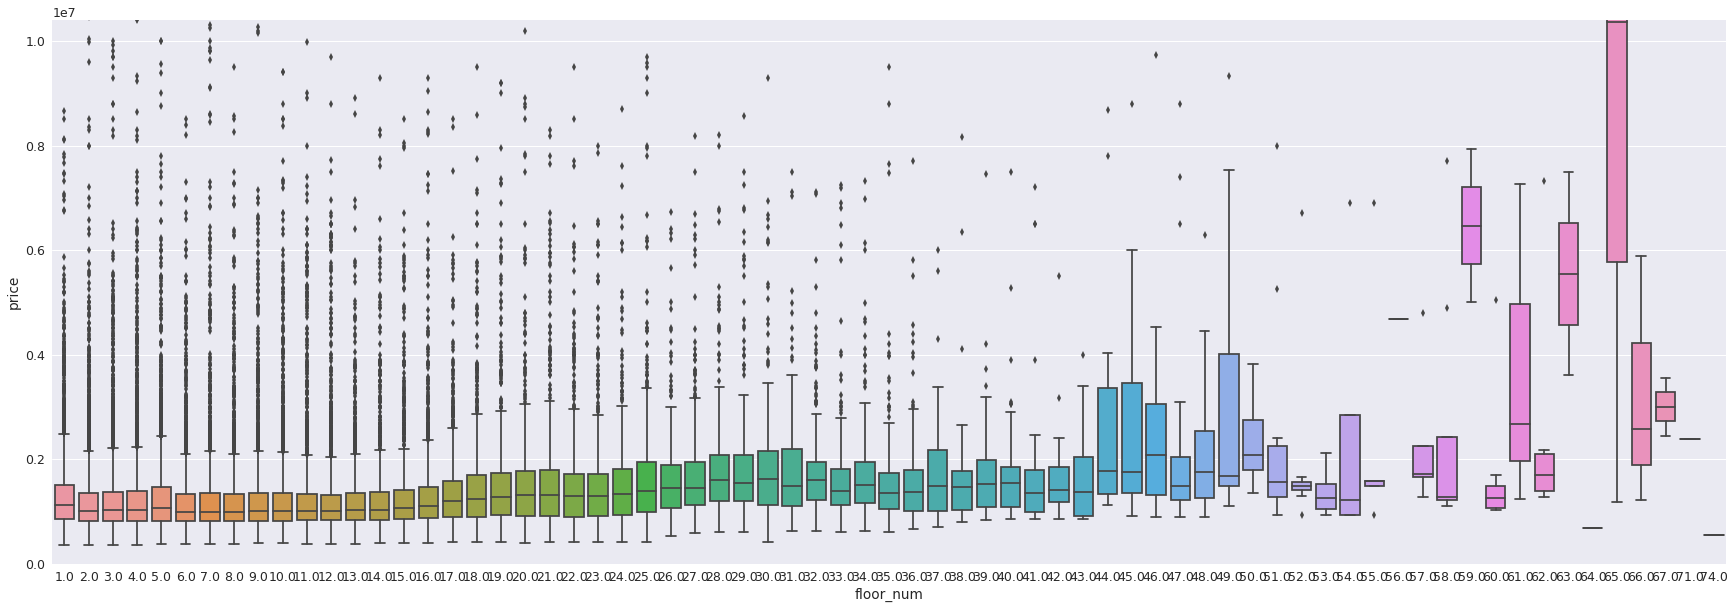

In [567]:
var = 'floor_num'
data = pd.concat([train_data_pri['price'], train_data_pri[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=10400000);
plt.show()

In [568]:
test_data_pri.floor_num.describe()

count    3401.000000
mean        9.045575
std         8.008414
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        68.000000
Name: floor_num, dtype: float64

In [569]:
train_data_pri.floor_num = np.where(train_data_pri['floor_num'].isnull(),10,train_data_pri['floor_num'])

In [570]:
print len(train_data_pri.project_name.unique())
print len(test_data_pri.project_name.unique())

2506
1234


In [571]:
train_data_pri.head(10)

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
115510,ECOPOLITAN,126 Punggol Walk #07-05,106,Strata,881600,30/01/2014,Executive Condominium,99 Yrs From 04/12/2012,Uncompleted,New Sale,19,82,828774,North East Region,Punggol,2014-1,1.400918,103.897199,7.0,5.0
115511,DUO RESIDENCES,1 Fraser Street #14-08,39,Strata,1085000,30/01/2014,Apartment,99 Yrs From 01/07/2011,Uncompleted,New Sale,7,18,189350,Central Region,Downtown Core,2014-1,1.300130,103.857268,14.0,8.0
115512,SKYPARK RESIDENCES,19 Sembawang Crescent #01-33,115,Strata,968000,30/01/2014,Executive Condominium,99 Yrs From 18/03/2013,Uncompleted,New Sale,27,75,757052,North Region,Sembawang,2014-1,1.443653,103.819952,1.0,33.0
115513,SPRINGDALE CONDOMINIUM,47 Hindhede Walk #06-03,105,Strata,1280000,30/01/2014,Condominium,999 Yrs From 21/06/1877,1998,Resale,21,58,587977,West Region,Bukit Panjang,2014-1,1.347668,103.771801,6.0,3.0
115514,WATERWOODS,19 Punggol Field Walk #14-09,158,Strata,1337089,30/01/2014,Executive Condominium,99 Yrs From 11/03/2013,Uncompleted,New Sale,19,82,828748,North East Region,Punggol,2014-1,1.390655,103.912753,14.0,9.0
115515,SUITES @ GUILLEMARD,70 Lim Ah Woo Road #03-10,30,Strata,605000,30/01/2014,Apartment,Freehold,Uncompleted,Sub Sale,15,43,438133,Central Region,Geylang,2014-1,1.312514,103.891731,3.0,10.0
115516,CASTLE GREEN,483 Yio Chu Kang Road #01-03,119,Strata,1100000,29/01/2014,Condominium,99 Yrs From 01/12/1993,1997,Resale,26,78,787057,North East Region,Ang Mo Kio,2014-1,1.385837,103.841570,1.0,3.0
115517,MABELLE,15 Lorong M Telok Kurau #05-03,104,Strata,1250000,29/01/2014,Apartment,Freehold,2009,Resale,15,42,425303,East Region,Bedok,2014-1,1.310587,103.909515,5.0,3.0
115518,VACANZA @ EAST,46 Lengkong Tujoh #01-27,107,Strata,1380000,29/01/2014,Condominium,Freehold,2014,Sub Sale,14,41,417396,East Region,Bedok,2014-1,1.329432,103.914805,1.0,27.0
115519,FORESTVILLE,26 Woodlands Drive 16 #09-13,120,Strata,958820,29/01/2014,Executive Condominium,99 Yrs From 06/08/2012,Uncompleted,New Sale,25,73,737882,North Region,Woodlands,2014-1,1.431915,103.799643,9.0,13.0


In [572]:
t = train_data_pri.project_name.unique()
t1 = test_data_pri.project_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
name_dict={}
for i in range(len(t)):
    name_dict[t[i]] = i+1
#print block_dict

train_data_pri['project_name'] = train_data_pri.project_name.apply(lambda x : name_dict[x])
test_data_pri['project_name'] = test_data_pri.project_name.apply(lambda x : name_dict[x])

2556 1234
['# 1 LOFT' '# 1 SUITES' '1 CANBERRA' ..., 'ZEDGE' 'ZENITH' 'ZEPHYR PARK'] ["D'LEEDON" 'MERGUI MANSIONS' 'MIMOSA PARK' ..., 'PINNACLE 16'
 'BALMORAL POINT' 'STUDIO 3']


In [573]:
print len(train_data_pri.address.unique())
print len(test_data_pri.address.unique())

69477
4033


In [574]:
print train_data_pri.shape
#train_data_pri= train_data_pri.drop(train_data_pri[train_data_pri.address == 'n'].index)
print train_data_pri.shape

(70022, 20)
(70022, 20)


In [575]:
##t = train_data_pri.address.unique()
##t1 = test_data_pri.address.unique()
#t = t + t1
##t = np.append(t,t1)
#t = t.unique()
##t = np.unique(t)
##t.sort()
##print len(t),len(t1)
##print t,t1
##address_dict={}
##for i in range(len(t)):
    ##address_dict[t[i]] = i+1
#print block_dict

##train_data_pri['address'] = train_data_pri.address.apply(lambda x : address_dict[x])
##test_data_pri['address'] = test_data_pri.address.apply(lambda x : address_dict[x])

In [576]:
t = train_data_pri.type_of_land.unique()
t1 = test_data_pri.type_of_land.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
landtype_dict={}
for i in range(len(t)):
    landtype_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_land'] = train_data_pri.type_of_land.apply(lambda x : landtype_dict[x])
test_data_pri['type_of_land'] = test_data_pri.type_of_land.apply(lambda x : landtype_dict[x])

2 2
['Land' 'Strata'] ['Strata' 'Land']


In [577]:
train_data_pri.contract_date = train_data_pri.contract_date.apply(lambda x : x.replace("/",""))
test_data_pri.contract_date = test_data_pri.contract_date.apply(lambda x : x.replace("/",""))
print train_data_pri.contract_date.unique()
print test_data_pri.contract_date.unique()

t = train_data_pri.contract_date.unique()
t1 = test_data_pri.contract_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
contract_dict={}
for i in range(len(t)):
    contract_dict[t[i]] = i+1
print contract_dict

train_data_pri['contract_date'] = train_data_pri.contract_date.apply(lambda x : contract_dict[x])
test_data_pri['contract_date'] = test_data_pri.contract_date.apply(lambda x : contract_dict[x])


[u'30012014' u'29012014' u'28012014' ..., u'03082017' u'02082017'
 u'01082017']
[u'29092017' u'28092017' u'27092017' u'26092017' u'25092017' u'22092017'
 u'21092017' u'20092017' u'19092017' u'18092017' u'15092017' u'14092017'
 u'13092017' u'12092017' u'11092017' u'08092017' u'07092017' u'06092017'
 u'05092017' u'04092017' u'09092017' u'05102017' u'04102017' u'03102017'
 u'02102017' u'23092017' u'19102017' u'18102017' u'17102017' u'16102017'
 u'13102017' u'12102017' u'11102017' u'10102017' u'09102017' u'06102017'
 u'01112017' u'31102017' u'30102017' u'29102017' u'28102017' u'27102017'
 u'26102017' u'25102017' u'24102017' u'23102017' u'22102017' u'21102017'
 u'20102017' u'11112017' u'10112017' u'09112017' u'08112017' u'07112017'
 u'06112017' u'03112017' u'02112017' u'27112017' u'26112017' u'24112017'
 u'23112017' u'22112017' u'21112017' u'20112017' u'17112017' u'16112017'
 u'15112017' u'14112017' u'13112017' u'30112017' u'29112017' u'28112017']
1302 72
{u'11072014': 444, u'11072015': 445

In [578]:
t = train_data_pri.property_type.unique()
t1 = test_data_pri.property_type.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
proptype_dict={}
for i in range(len(t)):
    proptype_dict[t[i]] = i+1
#print block_dict

train_data_pri['property_type'] = train_data_pri.property_type.apply(lambda x : proptype_dict[x])
test_data_pri['property_type'] = test_data_pri.property_type.apply(lambda x : proptype_dict[x])

6 6
['Apartment' 'Condominium' 'Detached House' 'Executive Condominium'
 'Semi-Detached House' 'Terrace House'] ['Condominium' 'Apartment' 'Terrace House' 'Semi-Detached House'
 'Detached House' 'Executive Condominium']


In [579]:
t = train_data_pri.type_of_sale.unique()
t1 = test_data_pri.type_of_sale.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
typesale_dict={}
for i in range(len(t)):
    typesale_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_sale'] = train_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])
test_data_pri['type_of_sale'] = test_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])

3 1
['New Sale' 'Resale' 'Sub Sale'] ['Resale']


In [580]:
train_data_pri.month = train_data_pri.month.apply(lambda x : x.replace("-",""))
test_data_pri.month = test_data_pri.month.apply(lambda x : x.replace("-",""))
print train_data_pri.month.unique()
print test_data_pri.month.unique()

t = train_data_pri.month.unique()
t1 = test_data_pri.month.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
month_dict={}
for i in range(len(t)):
    month_dict[t[i]] = i+1
#print block_dict

train_data_pri['month'] = train_data_pri.month.apply(lambda x : month_dict[x])
test_data_pri['month'] = test_data_pri.month.apply(lambda x : month_dict[x])

['20141' '20142' '20143' '20144' '20145' '20146' '20147' '20148' '20149'
 '201410' '201411' '201412' '20151' '20152' '20153' '20154' '20155' '20156'
 '20157' '20158' '20159' '201510' '201511' '201512' '20161' '20162' '20163'
 '20164' '20165' '20166' '20167' '20168' '20169' '201610' '201611' '201612'
 '20171' '20172' '20173' '20174' '20175' '20176' '20177' '20178']
['20179' '201710' '201711']
47 3


In [581]:
#def count_remaining_years(row):
#    current_year = datetime.today().year
#    tenure_years = int(row["tenure_year"])
#    tenure_start = row["tenure_start_date"].year
#    tenure_end = row["tenure_start_date"].year + tenure_years
#    tenure_remain =  tenure_end - current_year
#    return tenure_remain

In [582]:
blocks_streets_units = train_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
train_data_pri["address_block"] = blocks
train_data_pri["address_street"] = streets 

In [583]:
train_data_pri.address.head(100)

115510                126 Punggol Walk  #07-05 
115511                 1 Fraser Street  #14-08 
115512           19 Sembawang Crescent  #01-33 
115513                47 Hindhede Walk  #06-03 
115514           19 Punggol Field Walk  #14-09 
115515              70 Lim Ah Woo Road  #03-10 
115516           483 Yio Chu Kang Road  #01-03 
115517         15 Lorong M Telok Kurau  #05-03 
115518               46 Lengkong Tujoh  #01-27 
115519           26 Woodlands Drive 16  #09-13 
115520            9 Tampines Street 86  #09-26 
115521                130 Punggol Walk  #15-15 
115522             1 Pheng Geck Avenue  #11-14 
115523         11 Lorong N Telok Kurau  #04-04 
115524         176 Jalan Jurong Kechil  #07-32 
115525    28 Bukit Batok East Avenue 2  #15-17 
115526      40 Choa Chu Kang Street 64  #14-12 
115527           19 Punggol Field Walk  #16-09 
115528         174 Jalan Jurong Kechil  #02-20 
115529           42 Woodlands Drive 16  #10-44 
115530           19 Sembawang Crescent  

In [584]:
train_data_pri.address_block.unique()

array(['126', '1', '19', ..., '42B', '63F', '828'], dtype=object)

In [585]:
train_data_pri.address_street.unique()

array(['Punggol Walk  ', 'Fraser Street  ', 'Sembawang Crescent  ', ...,
       'Beatty Road ', 'Jalan Melati ', 'Mountbatten Road '], dtype=object)

In [586]:
blocks_streets_units = test_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
test_data_pri["address_block"] = blocks
test_data_pri["address_street"] = streets

In [587]:
test_data_pri.address_street.unique()

array(['Leedon Heights  ', 'Mergui Road  ', 'Mimosa Road  ',
       'Pasir Ris Grove  ', 'River Valley Road  ', 'Serangoon Avenue 3  ',
       'Springside Avenue ', 'Tanjong Rhu Road  ', 'Tavistock Avenue ',
       'Upper Serangoon Crescent  ', 'Woodgrove Drive  ',
       'Balmoral Road  ', 'Bayshore Road  ', 'Bishan Street 25  ',
       'Bukit Timah Road  ', 'Dover Rise  ', 'Duchess Avenue  ',
       'Dunearn Road  ', 'Flora Drive  ', 'Geylang Road  ',
       'Hougang Street 92  ', 'Jalan Krian ', 'Joo Chiat Place ',
       'Keppel Bay Drive  ', 'Kovan Road  ', 'Keppel Bay View  ',
       'Kim Yam Road  ', 'Lorong Marican ', 'Mandalay Road  ',
       'Pasir Ris Link  ', 'Peck Hay Road  ',
       'Ponggol Twenty-Fourth Avenue ', 'Robertson Quay  ',
       'Siglap Road  ', 'Tampines Avenue 1  ', 'Telok Blangah Road  ',
       'Thomson Road  ', 'Trevose Crescent  ', 'Whampoa East ',
       'Woo Mon Chew Road ', 'Amber Gardens  ', 'Amber Road  ',
       'Ang Mo Kio Avenue 8  ', 'Bishan St

In [588]:
train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : x.split("/")[2] if "/" in x else x )

t = train_data_pri.completion_date.unique()
t1 = test_data_pri.completion_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
completion_dict={}
for i in range(len(t)):
    completion_dict[t[i]] = i+1
#print block_dict

train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : completion_dict[x])
test_data_pri['completion_date'] = test_data_pri.completion_date.apply(lambda x : completion_dict[x])

79 64
['1927' '1929' '1930' '1932' '1938' '1939' '1941' '1948' '1949' '1950'
 '1951' '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960'
 '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' 'Uncompleted' 'Unknown'] ['2014' '1995' '1979' '2015' '2016' '1992' '1998' '1986' '2011' '2010'
 '2000' '2012' '2001' '1999' '1968' '2004' '2006' 'Unknown' '2005' '2009'
 '1975' '2013' '1996' '1997' '1991' '1994' '2002' '1982' '2008' '2007'
 '1987' '1978' '1983' '1984' '1972' '1990' '1993' '1971' '2003' '1969'
 '1985' '1989' '2017' '1980' '1976' '1956' '1988' '1967' '1958' '1957'
 '1955' '1977' '1960' '1966' '1965' '1961' '1974' '1953' '1941' 

In [589]:
t = train_data_pri.address_block.unique()
t1 = test_data_pri.address_block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_block_dict={}
for i in range(len(t)):
    address_block_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_block'] = train_data_pri.address_block.apply(lambda x : address_block_dict[x])
test_data_pri['address_block'] = test_data_pri.address_block.apply(lambda x : address_block_dict[x])

1391 572
['01' '02' '03' ..., '9H' '9K' '9P'] ['11' '81' '43' '115' '469' '135' '204' '3' '39A' '10' '1A' '66' '2' '941'
 '6' '50' '966' '538' '12' '355' '5' '46' '1' '19' '42' '21' '14' '78' '75'
 '17' '92' '138' '87' '120' '181' '68' '376' '42A' '9' '59' '7' '40' '20'
 '47' '210' '222' '97A' '33' '57' '132A' '51' '22B' '103A' '65' '8' '253A'
 '206' '165' '49' '130' '8D' '101' '53' '11A' '700' '27B' '285' '83' '26A'
 '884' '26' '128' '32G' '201' '29' '995' '48' '985' '52' '140' '37' '34'
 '295' '172' '151' '121' '333' '99' '25A' '221' '30' '124' '357' '507' '22'
 '50E' '23' '38' '73' '18' '69' '60' '4' '41' '552' '103' '187' '152' '11D'
 '77' '503' '91' '64' '28' '261' '967' '79' '90' '39' '200' '1C' '38A' '61'
 '156' '708' '461A' '93' '132' '214' '224' '113' '29A' '31' '460' '25'
 '208' '95' '158' '97' '119' '150' '245' '144' '202' '81B' '116' '2D' '27'
 '25C' '85' '30A' '331' '15' '520' '76' '281' '1001' '55B' '45' '263' '18A'
 '105' '190' '149' '117' '495' '356' '11F' '143' '89' '6

In [590]:
t = train_data_pri.address_street.unique()
t1 = test_data_pri.address_street.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_street_dict={}
for i in range(len(t)):
    address_street_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_street'] = train_data_pri.address_street.apply(lambda x : address_street_dict[x])
test_data_pri['address_street'] = test_data_pri.address_street.apply(lambda x : address_street_dict[x])

2156 965
['Adam Road  ' 'Adis Road  ' 'Ah Hood Road  ' ..., 'Zehnder Road  '
 'Zion Close  ' 'Zion Road  '] ['Leedon Heights  ' 'Mergui Road  ' 'Mimosa Road  ' 'Pasir Ris Grove  '
 'River Valley Road  ' 'Serangoon Avenue 3  ' 'Springside Avenue '
 'Tanjong Rhu Road  ' 'Tavistock Avenue ' 'Upper Serangoon Crescent  '
 'Woodgrove Drive  ' 'Balmoral Road  ' 'Bayshore Road  '
 'Bishan Street 25  ' 'Bukit Timah Road  ' 'Dover Rise  '
 'Duchess Avenue  ' 'Dunearn Road  ' 'Flora Drive  ' 'Geylang Road  '
 'Hougang Street 92  ' 'Jalan Krian ' 'Joo Chiat Place '
 'Keppel Bay Drive  ' 'Kovan Road  ' 'Keppel Bay View  ' 'Kim Yam Road  '
 'Lorong Marican ' 'Mandalay Road  ' 'Pasir Ris Link  ' 'Peck Hay Road  '
 'Ponggol Twenty-Fourth Avenue ' 'Robertson Quay  ' 'Siglap Road  '
 'Tampines Avenue 1  ' 'Telok Blangah Road  ' 'Thomson Road  '
 'Trevose Crescent  ' 'Whampoa East ' 'Woo Mon Chew Road '
 'Amber Gardens  ' 'Amber Road  ' 'Ang Mo Kio Avenue 8  '
 'Bishan Street 15  ' 'Bodmin Drive ' 'Canbe

In [591]:
train_data_pri.tenure = train_data_pri.tenure.str.strip()
train_data_pri.tenure = train_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
train_data_pri.tenure =  train_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [592]:
test_data_pri.tenure = test_data_pri.tenure.str.strip()
test_data_pri.tenure = test_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
test_data_pri.tenure =  test_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [593]:
train_data_pri.tenure.unique()

array(['99', '999', 'Freehold', '60', '103', '946', '929', '956', '100',
       '101', '70', '85', '102', '9999', '999999', '104', '947', 'N.A.',
       '940', '998', '993', '945', '89'], dtype=object)

In [594]:
test_data_pri.tenure.unique()

array(['99', 'Freehold', '999', '103', '956', '946', '9999', '929', '102',
       '85', '947', '998'], dtype=object)

In [595]:
t = train_data_pri.tenure.unique()
t1 = test_data_pri.tenure.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
tenure_dict={}
for i in range(len(t)):
    tenure_dict[t[i]] = i+1
#print block_dict

train_data_pri['tenure'] = train_data_pri.tenure.apply(lambda x : tenure_dict[x])
test_data_pri['tenure'] = test_data_pri.tenure.apply(lambda x : tenure_dict[x])

23 12
['100' '101' '102' '103' '104' '60' '70' '85' '89' '929' '940' '945' '946'
 '947' '956' '99' '993' '998' '999' '9999' '999999' 'Freehold' 'N.A.'] ['99' 'Freehold' '999' '103' '956' '946' '9999' '929' '102' '85' '947'
 '998']


In [596]:
t = train_data_pri.area.unique()
t1 = test_data_pri.area.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
area_dict={}
for i in range(len(t)):
    area_dict[t[i]] = i+1
#print block_dict

train_data_pri['area'] = train_data_pri.area.apply(lambda x : area_dict[x])
test_data_pri['area'] = test_data_pri.area.apply(lambda x : area_dict[x])

40 38
['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Changi  ' 'Choa Chu Kang' 'Clementi' 'Downtown Core'
 'Geylang' 'Hougang' 'Jurong East' 'Jurong West' 'Kallang' 'Mandai'
 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram' 'Pasir Ris'
 'Paya Lebar' 'Punggol' 'Queenstown' 'River Valley' 'Rochor' 'Sembawang'
 'Sengkang' 'Serangoon' 'Singapore River' 'Southern Islands' 'Sungei Kadut'
 'Tampines' 'Tanglin' 'Toa Payoh' 'Woodlands' 'Yishun'] ['Bukit Timah' 'Kallang' 'Serangoon' 'Pasir Ris' 'Tanglin' 'Yishun'
 'Hougang' 'Woodlands' 'Bedok' 'Bishan' 'Queenstown' 'Geylang'
 'Bukit Merah' 'River Valley' 'Novena' 'Newton' 'Punggol' 'Singapore River'
 'Tampines' 'Marine Parade' 'Ang Mo Kio' 'Choa Chu Kang' 'Bukit Batok'
 'Museum' 'Sembawang' 'Downtown Core' 'Jurong East' 'Toa Payoh' 'Rochor'
 'Southern Islands' 'Bukit Panjang' 'Sengkang' 'Clementi' 'Jurong West'
 'Outram' 'Orchard' 'Mandai' 'Changi  ']


In [597]:
t = train_data_pri.postal_code.unique()
t1 = test_data_pri.postal_code.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
postal_dict={}
for i in range(len(t)):
    postal_dict[t[i]] = i+1
#print block_dict

train_data_pri['postal_code'] = train_data_pri.postal_code.apply(lambda x : postal_dict[x])
test_data_pri['postal_code'] = test_data_pri.postal_code.apply(lambda x : postal_dict[x])

10486 2516
[ 18965  18978  18980 ..., 829731 829753 829755] [267955 219057 808005 ..., 248196 545040 588996]


In [598]:
t = train_data_pri.region.unique()
t1 = test_data_pri.region.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
region_dict={}
for i in range(len(t)):
    region_dict[t[i]] = i+1
#print block_dict

train_data_pri['region'] = train_data_pri.region.apply(lambda x : region_dict[x])
test_data_pri['region'] = test_data_pri.region.apply(lambda x : region_dict[x])

5 5
['Central Region' 'East Region' 'North East Region' 'North Region'
 'West Region'] ['Central Region' 'North East Region' 'East Region' 'North Region'
 'West Region']


In [599]:
t = train_data_pri.latitude.unique()
t1 = test_data_pri.latitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
lat_dict={}
for i in range(len(t)):
    lat_dict[t[i]] = i+1
#print block_dict

train_data_pri['latitude'] = train_data_pri.latitude.apply(lambda x : lat_dict[x])
test_data_pri['latitude'] = test_data_pri.latitude.apply(lambda x : lat_dict[x])

11724 2423
[ 1.23865052  1.23922338  1.23922338 ...,  1.46205263  1.46206902
  1.46210218] [ 1.31621028  1.31717013  1.3833584  ...,  1.29571275  1.38021727
  1.33863165]


In [600]:
t = train_data_pri.longitude.unique()
t1 = test_data_pri.longitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
long_dict={}
for i in range(len(t)):
    long_dict[t[i]] = i+1
#print block_dict

train_data_pri['longitude'] = train_data_pri.longitude.apply(lambda x : long_dict[x])
test_data_pri['longitude'] = test_data_pri.longitude.apply(lambda x : long_dict[x])

11106 2343
[ 103.6900697  103.6905256  103.6908931 ...,  103.9753514  103.9754185
  103.9755353] [ 103.80438833  103.85168183  103.86245702 ...,  103.8275808   103.89985746
  103.77858543]


In [601]:
train_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
115510,599,126 Punggol Walk #07-05,106,2,881600,1240,4,16,78,1,...,10442,3,26,1,11052,8145,7.0,5.0,112,1602
115511,556,1 Fraser Street #14-08,39,2,1085000,1240,1,16,78,1,...,660,1,11,1,1101,5463,14.0,8.0,10,477
115512,1790,19 Sembawang Crescent #01-33,115,2,968000,1240,4,16,78,1,...,9263,4,30,1,11597,2933,1.0,33.0,298,1698
115513,1825,47 Hindhede Walk #06-03,105,2,1280000,1240,2,19,58,2,...,7987,5,6,1,7153,1270,6.0,3.0,882,589
115514,2489,19 Punggol Field Walk #14-09,158,2,1337089,1240,4,16,78,1,...,10425,3,26,1,10788,9113,14.0,9.0,298,1600


In [602]:
test_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
0,498,11 Leedon Heights #06-31,92,2,1229,2,16,74,2,10,...,1688,1,7,47,3488,2360,6.0,31.0,60,1084
1,1229,81 Mergui Road #03-02,129,2,1229,1,22,55,2,8,...,742,1,16,47,3677,5298,3.0,2.0,1238,1351
2,1243,43 Mimosa Road #03-49,176,2,1229,2,22,39,2,28,...,10256,3,32,47,10385,5704,3.0,49.0,820,1367
3,2183,115 Pasir Ris Grove #03-42,46,2,1229,2,16,75,2,18,...,5756,2,24,47,9346,10241,3.0,42.0,74,1512
4,1652,469 River Valley Road #07-30,120,2,1229,2,19,75,2,10,...,1126,1,37,47,653,3450,7.0,30.0,877,1637


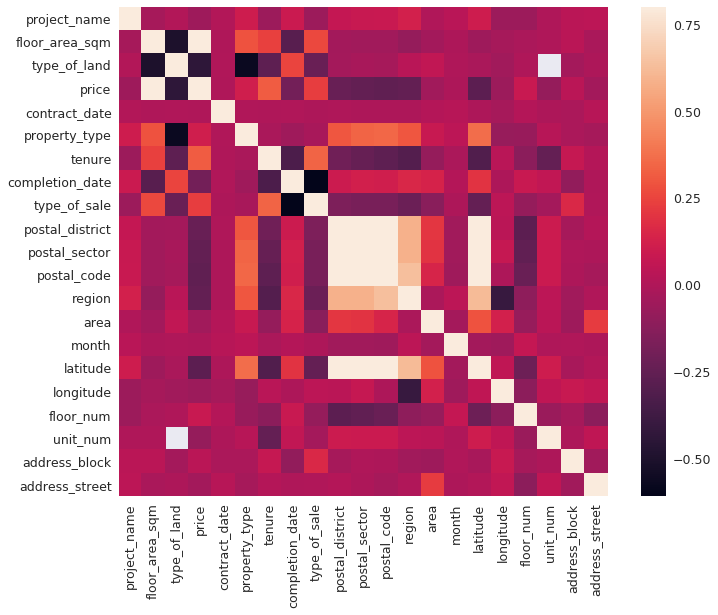

In [603]:
corrmat = train_data_pri.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

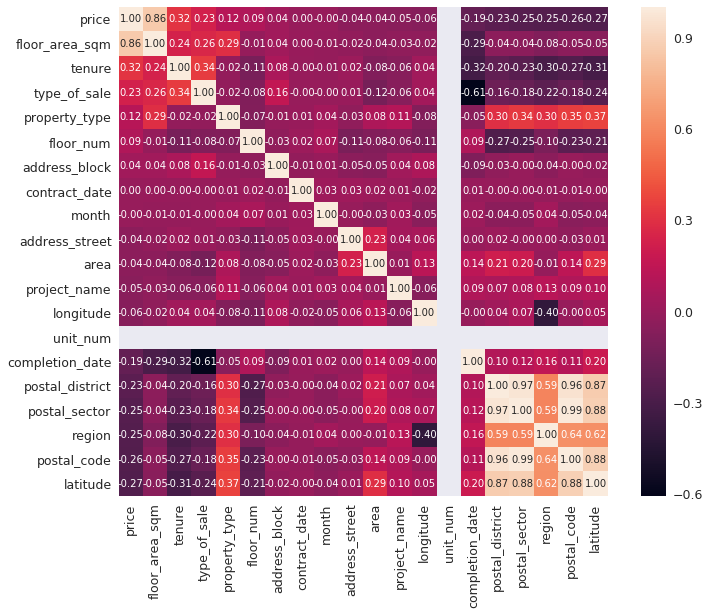

In [604]:
cols = corrmat.nlargest(20, 'price')['price'].index
cm = np.corrcoef(train_data_pri[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [605]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,floor_area_sqm
2,tenure
3,type_of_sale
4,property_type
5,floor_num
6,address_block
7,contract_date
8,month
9,address_street


In [606]:
train_data_pri = train_data_pri.drop(['unit_num'],axis=1)
train_data_pri = train_data_pri.drop(['address'],axis=1)
#train_data_pri = train_data_pri.drop(['project_name'],axis=1)
#train_data_pri = train_data_pri.drop(['contract_date'],axis=1)
#train_data_pri = train_data_pri.drop(['type_of_land'],axis=1)
#train_data_pri = train_data_pri.drop(['type_of_sale'],axis=1)
#train_data_pri = train_data_pri.drop(['region'],axis=1)
train_data_pri.head()

,project_name,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
115510,599,106,2,881600,1240,4,16,78,1,19,82,10442,3,26,1,11052,8145,7.0,112,1602
115511,556,39,2,1085000,1240,1,16,78,1,7,18,660,1,11,1,1101,5463,14.0,10,477
115512,1790,115,2,968000,1240,4,16,78,1,27,75,9263,4,30,1,11597,2933,1.0,298,1698
115513,1825,105,2,1280000,1240,2,19,58,2,21,58,7987,5,6,1,7153,1270,6.0,882,589
115514,2489,158,2,1337089,1240,4,16,78,1,19,82,10425,3,26,1,10788,9113,14.0,298,1600


In [607]:
skewed_feats = train_data_pri.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print skewness

                      Skew
floor_area_sqm   10.190032
price             9.168812
floor_num         1.678369
property_type     1.180129
type_of_sale      0.642605
region            0.449663
address_block     0.320896
area              0.156881
tenure            0.074592
longitude         0.032389
address_street   -0.005338
contract_date    -0.033128
postal_code      -0.156578
latitude         -0.191674
postal_sector    -0.230763
project_name     -0.246158
month            -0.254312
postal_district  -0.327174
completion_date  -2.014877
type_of_land     -3.739587


In [608]:
print skewness[skewness.index == 'completion_date'].Skew.values[0] < 0

True


In [609]:
skewness_new= skewness[abs(skewness['Skew']) > 0.75]
#print skewness_new
from scipy.special import boxcox1p, inv_boxcox1p
skewed_features = skewness_new.index
print skewed_features
for feat in skewed_features:
    if feat != 'price':
        if skewness[skewness.index == feat].Skew.values[0] < 0:
            print('neg',feat)
            #train_data_pri[feat] = boxcox1p(train_data_pri[feat], 0.5)
        else:
            print('pos',feat)
            #train_data_pri[feat] = boxcox1p(train_data_pri[feat], 0.1)

Index([u'floor_area_sqm', u'price', u'floor_num', u'property_type',
       u'completion_date', u'type_of_land'],
      dtype='object')
('pos', 'floor_area_sqm')
('pos', 'floor_num')
('pos', 'property_type')
('neg', 'completion_date')
('neg', 'type_of_land')


In [610]:
skewed_feats = train_data_pri.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print skewness

                      Skew
floor_area_sqm   10.190032
price             9.168812
floor_num         1.678369
property_type     1.180129
type_of_sale      0.642605
region            0.449663
address_block     0.320896
area              0.156881
tenure            0.074592
longitude         0.032389
address_street   -0.005338
contract_date    -0.033128
postal_code      -0.156578
latitude         -0.191674
postal_sector    -0.230763
project_name     -0.246158
month            -0.254312
postal_district  -0.327174
completion_date  -2.014877
type_of_land     -3.739587


In [611]:
train_original = train_data_pri.copy()
y_original = train_data_pri.price.values.copy()


 mu = 14.03 and sigma = 0.54



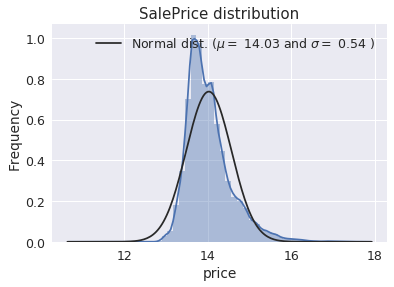

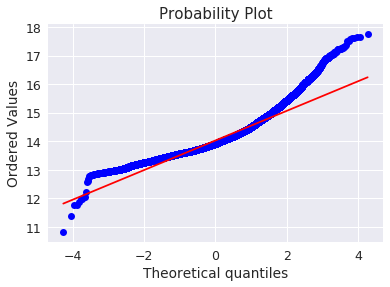

Skewness: 1.313101
Kurtosis: 2.945938


In [612]:
#from scipy.special import boxcox1p, inv_boxcox1p
#train_data_hdb["resale_price"] = np.log1p(train_data_hdb["resale_price"])

train_data_pri['price'] = boxcox1p(train_data_pri['price'], 0)
#tst = boxcox1p(train_data_pri['price'], 0)
#Check the new distribution 
sns.distplot(train_data_pri['price'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

#y_train = train_data_hdb["resale_price"].values

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [613]:
trainY = train_data_pri.price.values
print trainY
train_data_pri = train_data_pri.drop(['price'],axis=1)
train_data_pri.head()

[ 13.68949485  13.89709147  13.7829884  ...,  13.57978949  14.38082494
  13.50490235]


,project_name,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
115510,599,106,2,1240,4,16,78,1,19,82,10442,3,26,1,11052,8145,7.0,112,1602
115511,556,39,2,1240,1,16,78,1,7,18,660,1,11,1,1101,5463,14.0,10,477
115512,1790,115,2,1240,4,16,78,1,27,75,9263,4,30,1,11597,2933,1.0,298,1698
115513,1825,105,2,1240,2,19,58,2,21,58,7987,5,6,1,7153,1270,6.0,882,589
115514,2489,158,2,1240,4,16,78,1,19,82,10425,3,26,1,10788,9113,14.0,298,1600


In [614]:
train_data_pri.shape

(70022, 19)

In [615]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [616]:
np.random.seed(14)
test_size = .05
X_train, X_test, y_train, y_test = train_test_split(train_data_pri, trainY, test_size = test_size)
print X_train.shape, y_train.shape, X_test.shape, y_test.shape
print X_train,y_train

(66520, 19) (66520,) (3502, 19) (3502,)
        project_name  floor_area_sqm  type_of_land  contract_date  \
138945           994             155             2           1138   
172632          1797              86             2            996   
115718          2401             137             2            982   
120786          2249             191             2           1043   
165989          2509              96             2            941   
156497          2354             116             2            661   
143696          1105             248             2            761   
158653          1940              85             2            320   
129941          2271             109             2            214   
127102           651             153             2            203   
148020          1458             176             2            602   
146937          1827             280             2            172   
125084          2402              69             2            1

In [617]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=10, 
                             min_child_weight=1.5, n_estimators=3000,
                             reg_alpha=0.8, reg_lambda=0.7,
                             subsample=0.2, silent=1,
                             random_state =13)

In [618]:
n_folds = 10
kf = KFold(n_folds, shuffle=True, random_state=13).get_n_splits(X_train.values)
map_metrics= -cross_val_score(model_xgb, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
#rmse= np.sqrt(-cross_val_score(model_xgb, train_data_hdb.values, trainY, scoring="neg_mean_squared_error", cv = kf))
print map_metrics


[ 0.04419553  0.04544674  0.04385333  0.04355819  0.04467981  0.04519103
  0.04527532  0.04490378  0.04474036  0.0445155 ]


In [619]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=10, min_child_weight=1.5, missing=None,
       n_estimators=3000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0.8, reg_lambda=0.7, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.2)

In [620]:
pred_train = model_xgb.predict(X_train)

In [621]:
np.mean(np.abs((y_train - pred_train) / y_train)) * 100

0.24234889513644653

In [622]:
pred_test = model_xgb.predict(X_test)

In [623]:
np.mean(np.abs((y_test - pred_test) / y_test)) * 100

0.31496253334202973

In [624]:
GBoost = GradientBoostingRegressor(n_estimators=3500, learning_rate=0.05,
                                   max_depth=15, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [625]:
def mse_cv(model):
    kfold = KFold(10, shuffle=True, random_state=13).get_n_splits(X_train.values)
    metrics= -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kfold)
    return(metrics)

In [626]:
print("GBoost",mse_cv(GBoost))

('GBoost', array([ 0.0358312 ,  0.03740487,  0.03590987,  0.03646903,  0.03579942,
        0.03738161,  0.03656677,  0.0366168 ,  0.03600412,  0.03665972]))


In [627]:
GBoost.fit(X_train,y_train)
pred_Gboost = GBoost.predict(X_train)
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

0.047707640514009761

In [628]:
pred_test_gboost = GBoost.predict(X_test)
np.mean(np.abs((y_test - pred_test_gboost) / y_test)) * 100

0.25294835066770566

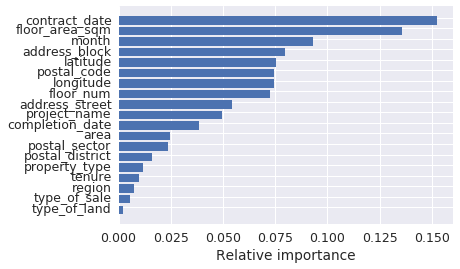

In [629]:
indices = np.argsort(GBoost.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

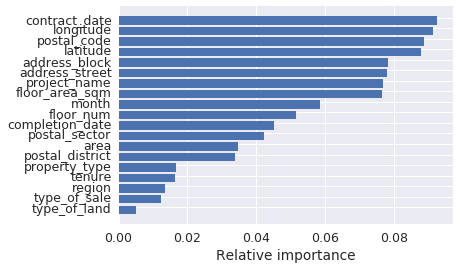

In [631]:
indices = np.argsort(model_xgb.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), model_xgb.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

In [632]:
np.random.seed(14)
test_size = .05

#print train_original.head()
#print y_original
#train_original = train_original.drop(['price'],axis=1)
X_tr, X_te, y_tr, y_te = train_test_split(train_original, y_original, test_size = test_size)
print X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

(66520, 20) (66520,) (3502, 20) (3502,)


In [633]:
print X_tr, y_tr

        project_name  floor_area_sqm  type_of_land    price  contract_date  \
138945           994             155             2  1836000           1138   
172632          1797              86             2   690000            996   
115718          2401             137             2  2625500            982   
120786          2249             191             2  1820000           1043   
165989          2509              96             2   832100            941   
156497          2354             116             2   978000            661   
143696          1105             248             2  4900000            761   
158653          1940              85             2   953000            320   
129941          2271             109             2   964600            214   
127102           651             153             2   951500            203   
148020          1458             176             2  1306000            602   
146937          1827             280             2  1400000     

In [634]:
pred_inv = inv_boxcox1p(pred_train, 0)

In [635]:
np.mean(np.abs((y_tr - pred_inv) / y_tr)) * 100

3.4397550321878834

In [636]:
pred_test_inv =inv_boxcox1p(pred_test, 0)
np.mean(np.abs((y_te - pred_test_inv) / y_te)) * 100

4.4853469133754089

In [637]:
pred_inv_gboost = inv_boxcox1p(pred_Gboost, 0)
print pred_inv_gboost

[ 1836251.94212243   693644.08391966  2623919.39877512 ...,
   831670.14928523  1638788.14809355  3329292.96614166]


In [638]:
np.mean(np.abs((y_tr - pred_inv_gboost) / y_tr)) * 100

0.67129743915623286

In [639]:
pred_test_binv =inv_boxcox1p(pred_test_gboost, 0)
np.mean(np.abs((y_te - pred_test_binv) / y_te)) * 100

3.6105648470117568

In [640]:
test_data_pri = test_data_pri.drop(['unit_num'],axis=1)
test_data_pri = test_data_pri.drop(['address'],axis=1)
#test_data_pri = test_data_pri.drop(['project_name'],axis=1)
#test_data_pri = test_data_pri.drop(['contract_date'],axis=1)
#test_data_pri = test_data_pri.drop(['type_of_land'],axis=1)
#test_data_pri = test_data_pri.drop(['type_of_sale'],axis=1)
#test_data_pri = test_data_pri.drop(['region'],axis=1)

test_data_pri.head()

,project_name,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
0,498,92,2,1229,2,16,74,2,10,26,1688,1,7,47,3488,2360,6.0,60,1084
1,1229,129,2,1229,1,22,55,2,8,21,742,1,16,47,3677,5298,3.0,1238,1351
2,1243,176,2,1229,2,22,39,2,28,80,10256,3,32,47,10385,5704,3.0,820,1367
3,2183,46,2,1229,2,16,75,2,18,51,5756,2,24,47,9346,10241,3.0,74,1512
4,1652,120,2,1229,2,19,75,2,10,24,1126,1,37,47,653,3450,7.0,877,1637


In [641]:
train_data_pri.head()

,project_name,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
115510,599,106,2,1240,4,16,78,1,19,82,10442,3,26,1,11052,8145,7.0,112,1602
115511,556,39,2,1240,1,16,78,1,7,18,660,1,11,1,1101,5463,14.0,10,477
115512,1790,115,2,1240,4,16,78,1,27,75,9263,4,30,1,11597,2933,1.0,298,1698
115513,1825,105,2,1240,2,19,58,2,21,58,7987,5,6,1,7153,1270,6.0,882,589
115514,2489,158,2,1240,4,16,78,1,19,82,10425,3,26,1,10788,9113,14.0,298,1600


In [642]:
test_data_pri.floor_num = np.where(test_data_pri['floor_num'].isnull(),10,test_data_pri['floor_num'])

In [643]:
test_y_gboost = GBoost.predict(test_data_pri)
print test_y_gboost

[ 14.23071907  14.08191615  14.28040998 ...,  14.3428021   14.13396255
  14.03132291]


In [644]:
test_y_gboost_inv = inv_boxcox1p(test_y_gboost, 0)
print test_y_gboost_inv

[ 1514685.53187164  1305263.35670906  1591853.07277559 ...,
  1694336.0536895   1374996.61254364  1240868.5080598 ]


In [645]:
test_temp = pd.read_csv('./data/private_test.csv')
idx = test_temp['index']
print idx

0       3766
1       3767
2       3768
3       3769
4       3770
5       3771
6       3772
7       3773
8       3774
9       3775
10      3776
11      3777
12      3778
13      3779
14      3780
15      3781
16      3782
17      3783
18      3784
19      3785
20      3786
21      3787
22      3788
23      3789
24      3790
25      3791
26      3792
27      3793
28      3794
29      3795
        ... 
4003    7769
4004    7770
4005    7771
4006    7772
4007    7773
4008    7774
4009    7775
4010    7776
4011    7777
4012    7778
4013    7779
4014    7780
4015    7781
4016    7782
4017    7783
4018    7784
4019    7785
4020    7786
4021    7787
4022    7788
4023    7789
4024    7790
4025    7791
4026    7792
4027    7793
4028    7794
4029    7795
4030    7796
4031    7797
4032    7798
Name: index, Length: 4033, dtype: int64


In [646]:
sub_1 = pd.Series(test_y_gboost_inv, name='price')
sub_1 = sub_1.to_frame()
sub_1 = pd.concat([idx, sub_1], axis=1)
#sub_1.index.name = 'index'
#sub_1.index = idx
#sub_1 = pd.concat([idx, test_y_gboost], axis=1)
#sub_1.to_csv("./data/submission-private-1.csv", header=['price'])

In [647]:
print sub_1

      index         price
0      3766  1.514686e+06
1      3767  1.305263e+06
2      3768  1.591853e+06
3      3769  6.164532e+05
4      3770  2.354397e+06
5      3771  9.065465e+05
6      3772  2.783644e+06
7      3773  3.473210e+06
8      3774  3.115023e+06
9      3775  1.268301e+06
10     3776  7.110547e+05
11     3777  3.172879e+06
12     3778  8.161334e+05
13     3779  1.596163e+06
14     3780  2.113136e+06
15     3781  1.353144e+06
16     3782  2.249113e+06
17     3783  2.617890e+06
18     3784  1.219249e+06
19     3785  9.625387e+05
20     3786  7.835068e+05
21     3787  8.022553e+05
22     3788  3.064974e+06
23     3789  2.132063e+06
24     3790  2.579388e+06
25     3791  1.886948e+06
26     3792  1.469733e+06
27     3793  2.575680e+06
28     3794  1.792320e+06
29     3795  1.884825e+06
...     ...           ...
4003   7769  1.749655e+06
4004   7770  1.353154e+06
4005   7771  1.343967e+06
4006   7772  2.090701e+06
4007   7773  2.937118e+06
4008   7774  2.568425e+06
4009   7775 

In [648]:
sub_1.to_csv('private_predicted_5.csv',index=False)

In [649]:
s1 = pd.read_csv('./data/submission-7.csv')
print s1

      index          price
0         0  316146.113892
1         1  430153.225673
2         2  291630.061810
3         3  280222.631946
4         4  281690.664786
5         5  285122.801005
6         6  318222.069087
7         7  265370.752818
8         8  321110.798354
9         9  291136.410562
10       10  265671.567683
11       11  282707.807390
12       12  297656.542110
13       13  262666.691284
14       14  267999.400330
15       15  362469.240641
16       16  338204.070514
17       17  285852.156206
18       18  280999.759449
19       19  328028.347090
20       20  392491.923723
21       21  365475.763805
22       22  280603.007900
23       23  349746.404732
24       24  292500.723502
25       25  280202.631839
26       26  401599.058392
27       27  318875.899571
28       28  273256.952707
29       29  316560.811077
...     ...            ...
3736   3736  310558.022191
3737   3737  378902.091622
3738   3738  310697.150953
3739   3739  368142.311221
3740   3740  323010.855687
3

In [650]:
s2 = pd.read_csv('private_predicted_5.csv')
print s2

      index         price
0      3766  1.514686e+06
1      3767  1.305263e+06
2      3768  1.591853e+06
3      3769  6.164532e+05
4      3770  2.354397e+06
5      3771  9.065465e+05
6      3772  2.783644e+06
7      3773  3.473210e+06
8      3774  3.115023e+06
9      3775  1.268301e+06
10     3776  7.110547e+05
11     3777  3.172879e+06
12     3778  8.161334e+05
13     3779  1.596163e+06
14     3780  2.113136e+06
15     3781  1.353144e+06
16     3782  2.249113e+06
17     3783  2.617890e+06
18     3784  1.219249e+06
19     3785  9.625387e+05
20     3786  7.835068e+05
21     3787  8.022553e+05
22     3788  3.064974e+06
23     3789  2.132063e+06
24     3790  2.579388e+06
25     3791  1.886948e+06
26     3792  1.469733e+06
27     3793  2.575680e+06
28     3794  1.792320e+06
29     3795  1.884825e+06
...     ...           ...
4003   7769  1.749655e+06
4004   7770  1.353154e+06
4005   7771  1.343967e+06
4006   7772  2.090701e+06
4007   7773  2.937118e+06
4008   7774  2.568425e+06
4009   7775 

In [651]:
#s3 = s2[['index','price']]
#print s3

In [652]:
final = pd.concat([s1,s2])
print final

      index         price
0         0  3.161461e+05
1         1  4.301532e+05
2         2  2.916301e+05
3         3  2.802226e+05
4         4  2.816907e+05
5         5  2.851228e+05
6         6  3.182221e+05
7         7  2.653708e+05
8         8  3.211108e+05
9         9  2.911364e+05
10       10  2.656716e+05
11       11  2.827078e+05
12       12  2.976565e+05
13       13  2.626667e+05
14       14  2.679994e+05
15       15  3.624692e+05
16       16  3.382041e+05
17       17  2.858522e+05
18       18  2.809998e+05
19       19  3.280283e+05
20       20  3.924919e+05
21       21  3.654758e+05
22       22  2.806030e+05
23       23  3.497464e+05
24       24  2.925007e+05
25       25  2.802026e+05
26       26  4.015991e+05
27       27  3.188759e+05
28       28  2.732570e+05
29       29  3.165608e+05
...     ...           ...
4003   7769  1.749655e+06
4004   7770  1.353154e+06
4005   7771  1.343967e+06
4006   7772  2.090701e+06
4007   7773  2.937118e+06
4008   7774  2.568425e+06
4009   7775 

In [653]:
final.to_csv('final_predicted_5.csv',index=False)